## Исследование объявлений о продаже квартир.

В распоряжении имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры для определения рыночной стоимости объектов недвижимости, что позволит построить автоматизированную систему. 


#### Описание данных:
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)

#### Данное исследование разделим на несколько частей.

### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации.](#1-bullet)

### Часть 2. Предобработка данных:
* [1. Работа с пропусками.](#2-bullet)
* [2. Приведение данных к нужным типам.](#3-bullet)

### Часть 3. Подготовка данных:
* [1. Расчет цены квадратного метра.](#4-bullet)
* [2. Добавление дня недели, месяца и года к таблице.](#5-bullet)
* [3. Добавление к таблице столбца: этаж квартиры с параметрами первый, последний и другой.](#6-bullet)
* [4. Добавление к таблице соотношения жилой и общей площади, а также отношения площади кухни к общей площади.](#7-bullet)


### Часть 4. Исследовательский анализ данных:

* [1. Изучение параметров: площадь, цена, число комнат, высота потолков.](#8-bullet)
* [2. Изучение времени продажи квартиры.](#9-bullet)
* [3. Редкие и выбивающиеся значения.](#10-bullet)
* [4. Факторы, которые больше всего влияют на стоимость квартиры.](#11-bullet)
* [5. 10 населённых пунктов с наибольшим числом объявлений.](#12-bullet)
* [6. Зависимость цены от удалённости от центра.](#13-bullet)
* [7. Сегмент квартир в центре: описание](#14-bullet)

### Часть 5. Общий вывод

* [1. Общий вывод.](#15-bullet)

### Часть 1. Изучение общей информации:

#### 1-bullet

1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t") #открываем исходный файл с данными с разделителем
data.info() #получаем общую информацию о датасете
display(data.head(5)) #выводим на экран первые пять строк, чтобы изучить датасет зрительно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

Открыв файл и получив общую информацию методом info(), видим, что в датасете всего одна колонка. Зрительно видно, что все данные склеились в одну строку, значит необходимо использовать разделитель - знак таблуляции.
Затем еще раз откроем первые 10 строк датасета и получим общую информацию. Как видим, образовались 22 колонки. При этом они содеражат разные типы данных, а во многих колонках имеется большое количество пропущенных значений, т.к. всего в датасете 23699 строк.
Далее попробуем заполнить случайные пропуски.

### Часть 2. Предобработка данных:

#### 2-bullet

1. Работа с пропусками.

In [2]:
data['balcony'] = data['balcony'].fillna(0) #заменим пропуски в балконах на нули
data['is_apartment'] = data['is_apartment'].fillna(False) #заменим пропуски на False 
data['locality_name'] = data['locality_name'].fillna('Без названия') #заменим пропуски на Без названия'
median_ceiling_height = data['ceiling_height'].median() #рассчитаем медиану высоты потолка
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height) #заменим пропуск в колонке ceiling_height на медиану 

data['floors_total'] = data['floors_total'].fillna(0)
def n_floors_total (row): #объявим функциюБ рассчитывающую нулевые значения количества этажей
   if row['floors_total'] == 0: #зададим условие этаж равен 1
       return row['floor'] + 1 #возвращаем этаж плюс 1
   if row['floors_total'] > 0: #зададим условие этаж больше нуля
       return row['floors_total'] #возвращаем прежнее значение
data['floors_total'] = data.apply (lambda row: n_floors_total(row), axis=1) #создадим новую колонку и применим функцию ко всем строкам датасета

data.describe() #проверим статистические характеристики данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.675092,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.595719,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Как убедились ранее, во многих колонках имеются пропуски.
Прокуски имеются в следующих колонках: ceiling_height,	floors_total, living_area, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition имеют практически однинаковое значение, при этом значения указанных столбцов заполняются автоматически. Значит отсутствие данных в эти столбцах связано с работой программы, привязанной к картографическим данным. Вероятнее всего, пропуски можно попробовать восстановить обратившись к коллегам, которые составляли программу, если у них имеются такие данные. Возможная причина - неполный географический охват территории данными, те. на пропуски возникли там, где у программы не было соответтсвующих данных.  

Проще всего заполнить пропуски в колонке balcony, где пропуски заменим 0, тк. владельцы, скорее всего, не указали эти значения по причине отсутствия балкона в квартире. Аналогично можно поступить с колоной is_apartment. Раз не указано значение, то это не апартаменты. Заполним пустующие значения булева массива на False. Не достает 49 значений в колонке locality_name. Срез по этим значениям показывает, что это, как правило, отдаленные от центра Санкт-Петербурга населенные пункты. Поэтому пропущенные значения заменим на Без названия.   

В столбце ceiling_height пропуски заполним медианой, тк данные этой колоники понадабятся для последующих расчетов.

В колонке floors_total, не достает всего 86 значений. Однако срез этих данных показывает, что при этом в объявлении указан этаж, на котором находится квартира. Значения этажа разнятся от 1 до 20. поэтому их сложно заменить однозначно. Поэтому сначала заполним пропуски нулями, а затем нули в значениях колонки заменим на этаж +1 (потому что не обязательно этаж совпадает с количеством этажей, а в задании нам нужно быть выделить в том числе последние этажи) при помощи функции. Оставшиеся значения оставим без изменения. Применим эту функцию применив метод aplay(), но не к столбцу, а к строкам.

### Часть 2. Предобработка данных:

#### 3-bullet

2. Приведение данных к нужным типам.

In [3]:
data['last_price'] = data['last_price'].astype('int') #заменим тип данных на int
data['total_area'] = data['total_area'].astype('int') #заменим тип данных на int
data['floors_total'] = data['floors_total'].astype('Int64') #заменим тип данных на Int64
#data['living_area'] = data['living_area'].astype('Int64') #заменим тип данных на Int64
data['is_apartment'] = data['is_apartment'].astype('int') #заменим тип данных на int
data['studio'] = data['studio'].astype('int') #заменим тип данных на int
data['open_plan'] = data['open_plan'].astype('int') #заменим тип данных на int
#data['kitchen_area'] = data['kitchen_area'].astype('Int64') #заменим тип данных на Int64  
data['balcony'] = data['balcony'].astype('int') #заменим тип данных на int
data['airports_nearest'] = data['airports_nearest'].astype('Int64') #заменим тип данных на Int64
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64') #заменим тип данных на Int64
data['parks_around3000'] = data['parks_around3000'].astype('Int64') #заменим тип данных на Int64
data['parks_nearest'] = data['parks_nearest'].astype('Int64') #заменим тип данных на Int64
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64') #заменим тип данных на Int64
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64') #заменим тип данных на Int64
#data['days_exposition'] = data['days_exposition'].astype('Int64') #заменим тип данных на int

data.info() #проверим, изменился ли тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null int64
open_plan               23699 non-null int64
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000        18181

### Вывод

Для удобства работы заменим тип данных в колонках last_price, total_area, rooms, floors_total, is_apartment, studio, open_plan, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest на целочисленный методом astype(). Там, где метод не работает с аргументом int(ввиду наличия пропусков), укажем Int64.

### Часть 3. Подготовка данных:

#### 4-bullet

1. Расчет цены квадратного метра.

In [4]:
data['p_s_meter_price'] = data['last_price'] / data['total_area'] #добавим столбец цены квадратного метра, разделив стоимость квартиры на общую площадь
data['p_s_meter_price'] = data['p_s_meter_price'].astype('int') #приведем тип данных к целочисленному
display(data.head()) #выведем на экран первые пять строк для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,p_s_meter_price
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16,51.0,8,0,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370
1,7,3350000,40,2018-12-04T00:00:00,1,2.65,11,18.6,1,0,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,83750
2,10,5196000,56,2015-08-20T00:00:00,2,2.65,5,34.3,4,0,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,92785
3,0,64900000,159,2015-07-24T00:00:00,3,2.65,14,NaN,9,0,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,408176
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14,32.0,13,0,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000


### Вывод

Добавим столбец цены квадратного метра, который получим путем деления стоимости квартиры на общую площадь, а затем для удобства дальнейшей работы изменим тип данных в получившемся столбце на целочисленный.

### Часть 3. Подготовка данных:

#### 5-bullet

2. Добавление дня недели, месяца и года к таблице.

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #приведем дату и время к общему формату для дальнейшей работы
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #добавим столбец дня недели
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month #добавим столбец месяца
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year #добавим столбец года
display(data.head()) #выведем на экран первые пять строк для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,p_s_meter_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,0,...,16028,1,482,2,755,NaN,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,0,...,18603,0,NaN,0,NaN,81.0,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,0,...,13933,1,90,2,574,558.0,92785,3,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14,NaN,9,0,...,6800,2,84,3,234,424.0,408176,4,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,0,...,8098,2,112,1,48,121.0,100000,1,6,2018


### Вывод

Для работы с датой и временем приведем их к одному формату методом to_datetime(). Затем добавим колонку weekday_exposition, воспользовавшись методом dt.weekday(). Также создадим колонки month_exposition, year_exposition воспользовавшись методом DatetimeIndex().

### Часть 3. Подготовка данных:

#### 6-bullet

3. Добавление к таблице столбца: этаж квартиры с параметрами первый, последний и другой.

In [6]:
def new_floor (row): #объявим функцию рассчитывающая новые значения этажа
   if row['floor'] == 1: #зададим условие этаж равен 1
      return 'первый' #возвращаем первый
   if row['floor'] > 1 and row['floor'] == row['floors_total']: #зададим условие этаж больше 1 и этаж равен количеству этажей
      return 'последний' #возвращаем последний
   if row['floor'] > 1 and row['floor'] < row['floors_total']: #зададим условие этаж больше 1 и этаж меньше количества этажей
      return 'другой' # возвращаем другой

data['new_floor'] = data.apply (lambda row: new_floor(row), axis=1) #создаем новую колонку применив объявленную функуцию к стровшке
display(data.head()) #выведем на экран 5 строк образовавшейся таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,p_s_meter_price,weekday_exposition,month_exposition,year_exposition,new_floor
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,0,...,1,482,2,755,NaN,120370,3,3,2019,другой
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,0,...,0,NaN,0,NaN,81.0,83750,1,12,2018,первый
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,0,...,1,90,2,574,558.0,92785,3,8,2015,другой
3,0,64900000,159,2015-07-24,3,2.65,14,NaN,9,0,...,2,84,3,234,424.0,408176,4,7,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,0,...,2,112,1,48,121.0,100000,1,6,2018,другой


### Вывод 

Объявим функцию, которая будет возвращать значения нового столбца. Зададим условия: если этаж равен 1, то возвращаем первый, если этаж больше 1 и этаж равен количеству этажей, то возвращаем последний, если этаж больше 1, но меньше значения количество этажей, возвращаем другой. Затем создадим новую колонку, применив полученную функцию, методом aplay(), к строкам датасета.

### Часть 3. Подготовка данных:

#### 7-bullet

4. Добавление к таблице соотношения жилой и общей площади, а также отношения площади кухни к общей площади.

In [7]:
data['ratio_living_total_area'] = data['living_area'] / data['total_area'] #создадим новый столбец отношения жилой площади к общей, поделив жилую площадь на общую
data['ratio_kitchen_total_area'] = data['kitchen_area'] / data['total_area'] #создадим новый столбец отношения площади кухни к общей, поделив площадь кухни на общую
display(data.head()) #выведем полученные данные на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,p_s_meter_price,weekday_exposition,month_exposition,year_exposition,new_floor,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,0,...,2,755,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,0,...,0,NaN,81.0,83750,1,12,2018,первый,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,0,...,2,574,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159,2015-07-24,3,2.65,14,NaN,9,0,...,3,234,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,0,...,1,48,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Вывод
 

### Часть 4. Исследовательский анализ данных:

#### 8-bullet

1. Изучение параметров: площадь, цена, число комнат, высота потолков.

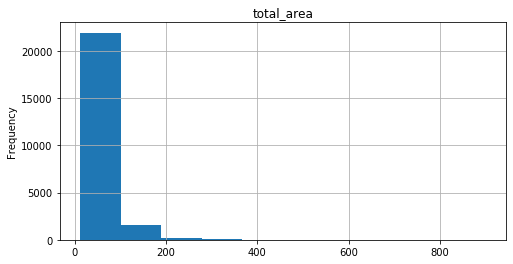

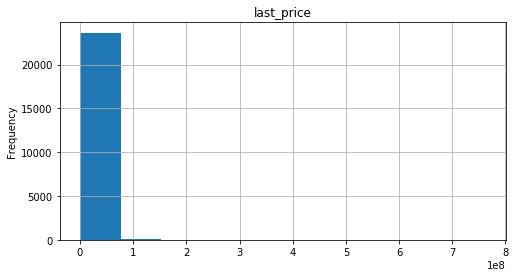

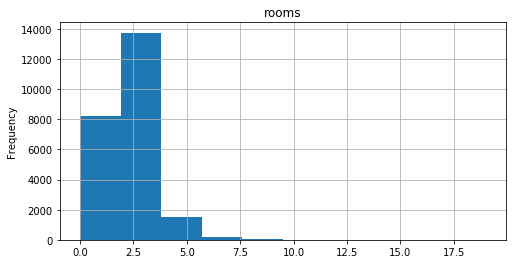

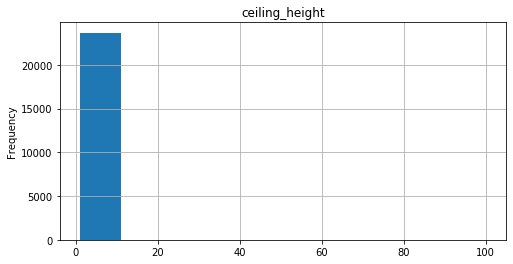

In [8]:
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib

col = ['total_area', 'last_price', 'rooms', 'ceiling_height'] #составим список названий колонок, к которым применим метод plot()
#plots_names = ['total_area_hist', 'last_price_hist', 'rooms_hist', 'ceiling_height_hist']
for i in col: #зададим цикл, который будет перебирать каждый элелемент из списка колонок
    data[i].plot(kind='hist', grid=True, figsize=(8,4), title=(i)) #построим гистограммы для каждого столбца датасэта с названием колонки из списка, также назовем и графики
    plt.show() #вызовем метод раздельного построения графиков 

### Вывод

Для того, чтобы вывести отдельные гисторамыы параметров с разным числом корзин импортируем бибилиотеку matplotlib, а после постороения гистораммы воспользуемся методом show().
Для наглядности в гистограммах площади и цены используем параметр bins=50 и параметры range=(0,500)для площади, range=(0,800000000). В гистограммах числа комнат и высоты потолков установим параметр bins=10 и параметры range=(0,10) для числа комнат, range=(0,5) для высоты потолков.
Проанализировав гистограммы площади, цены, числа комнат и высоты потолков, видно, что основное количество некорректных данных имеется в гисторгамме цены, где почти все данные находятся в диапазоне менее 0-10 млн. руб., при этом есть показатели близкие к нулю (ранее метод describe показал минимальное значение 12 тыс. руб.), что очень подозрительно и наличие выбросов в момент, когда цена превышает 28 млн. Значит с этой колонкой нужно будет работать. Есть выбросы в гистограмме площади (тоже нужно будет работать).
Остальные гистограммы показали в целом нормальное распределение, похожее на реальность.

### Часть 4. Исследовательский анализ данных:

#### 9-bullet

2. Изучение времени продажи квартиры.

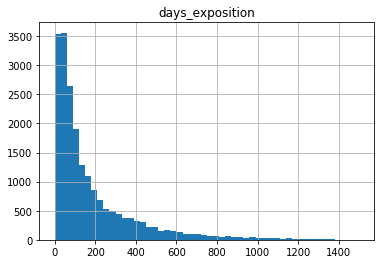

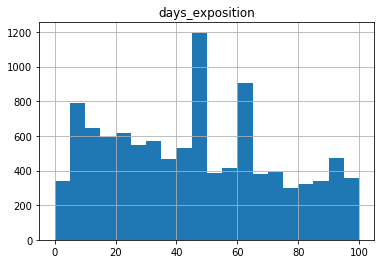

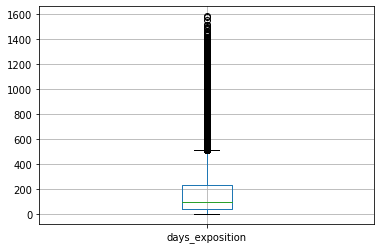

,days_exposition
mean,180.888634
median,95.000000


,mean,median,min,max,count
,days_exposition,days_exposition,days_exposition,days_exposition,days_exposition
year_exposition,,,,,
2014,910.983193,875.0,554.0,1580.0,119
2015,648.035682,576.0,182.0,1512.0,1121
2016,320.748159,235.0,3.0,1153.0,2716
2017,158.955929,103.0,3.0,825.0,7919
2018,94.337963,64.0,3.0,465.0,7560
2019,30.931671,23.0,1.0,110.0,1083


In [9]:
data.hist('days_exposition', bins=50, range=(0,1500)) #строим гистограмму для времени продажи
plt.show() #вызываем метод, показывающий отдельных график

data.hist('days_exposition', bins=20, range=(0,100)) #строим гистограмму для времени продажи
plt.show() #вызываем метод, показывающий отдельных график

data.boxplot('days_exposition') #строим диаграмму размаха для времени продажи
plt.show() #вызываем метод, показывающий отдельных график

display(data.agg({'days_exposition': ['mean', 'median']})) #находим средние и медиану для времени продажи

days_exposition_by_year = data.pivot_table(index='year_exposition', values='days_exposition', aggfunc=['mean', 'median']) #находим среднее и медиану для времени продажи в зависимости от года
#display(days_exposition_by_year) #выведем на экран полученную таблицу значений

days_exposition_by_year_min_max = data.pivot_table(index='year_exposition', values='days_exposition', aggfunc=['min', 'max']) #находим минимальные и максимальные значения времени продажи в зависимости от года
#display(days_exposition_by_year_min_max) #выведем на экран полученную таблицу значений

part_days_exposition_by_year = data.pivot_table(index='year_exposition', values='days_exposition', aggfunc=['count']) #находим минимальные и максимальные значения времени продажи в зависимости от года
#display(part_days_exposition_by_year) #выведем на экран полученную таблицу значений

data_days_exposition_info = days_exposition_by_year.join(days_exposition_by_year_min_max,on='year_exposition') #присоединим две таблицы по столбцу 'year_exposition'
data_days_exposition_info = data_days_exposition_info.join(part_days_exposition_by_year, on='year_exposition') #присоединим две таблицы по столбцу 'year_exposition'
display(data_days_exposition_info) #выведем на экран полученную таблицу значений

### Вывод

Построим гистограмму времени продажи с параметрами: bins=50, range=(0,1500). На первый взгляд гисторгамма напоминает распределение Пуассона. Чтобы убедиться построим еще одну гистограмму с параметрами bins=20, range=(0,100). Также построим диаграмму размаха. Далее найдем среднее и медиану для времени продажи и выведем на экран. Получается среднее время продажи квартиры между 50 и 100 днями(соотношение гисторгаммы и медианы). Но среднее выбивается, значит имееются выбросы. Попробуем проверить. Построим сводную таблицу значений среднего и медианы времени продажи квартиры в зависимоти от года. Вновь, среднее и медиана значительно разнятся: в 2014 году квартиры в среднем(по значению медианы) продавали более 2-х лет, в 2015 году почти 2 года, в 2016 году - около года, а в 2019 году - всего за 23 дня. Тут явно прослеживается проблема в данных. Вероятнее всего до 2017 года вообще нет данных о времени продажи и эти значения заполнены автоматическим образом или были удалены автоматическим образом, а собственники не снимали объявление, либо мошенническая деятельность. Ведь средние продажи квартир в 2019 году укладывались в 23 дня, что тоже подозрительно быстро.

Чтобы проверить возникшую гипотезу, попробуем поступить следующим образом: построим свобдную таблицу максимальных и минимальных значений времени продажи в зависимости от года.
Действительно, получилось, что в 2014 и 2015 года максимальные сроки продажи квартир примерно равны и составляют более 4 лет(такое возможно, ведь это максимальные сроки), но минимальные сроки продажи в 2014 году 554 дня(почти 2 года!!!) и 182 дня в 2015 году (полгода), что очень много и не соответствует действительности.

Но есть проблема и с минимальными значениями. Так в 2019 году имеются квартиры, которые продавались за 1 день. На минимальных значениях остановимся позже.

Далее выясним количество объявлений, которые продавались в 2014 и 2015 году, ведь они сильно искажают данные. Построим сводную таблицу количества объявлений с временем продажи в зависимости от года.
Получили, что в 2014 году было всего 119 объявлений. поэтому объяснимо, почему там такие высокие значения. Значит сервис яндекс.недвижимость только начинал развиваться и там были в основном объявления, по объектам недвижимости, которые сложно продавались и их размещали на всех возможных сервисах по продаже недвижимости.

Данные за 2019 года тоже явно не полные, тк там тоже мало объявлений и примерно равно количеству объявлений в 2015 году - примерно по 1000 объявлений.
Наиболее объективная картина расскрывается в данных за 2017 и 2018 годы, тк там примерно равное количество объявлений - около 8000.

Выходит, что среднее время продажи квартиры действительно составляет 40-100 дней, что и показала нам гистограмма и диаграмма размаха. Ориентируясь на первый пик после которого идет второй настоящий пик гисторгаммы(вторая гисторгамма в меньшем масштабе), а также диаграмму размаха(третий квартиль), можно предопложить, что  слишком быстрые продажи - менее 40 дней, а слишком долгие - более 250 дней.
Продажа квартиры за единицу времени должна напоминать распределение Пуассона.



### Часть 4. Исследовательский анализ данных:

#### 10-bullet

3. Редкие и выбивающиеся значения.

,mean,median,min,max,count
,last_price,last_price,last_price,last_price,last_price
year_exposition,,,,,
2014,1.208714e+07,7700000,1200000,79339000,137
2015,8.572833e+06,5350000,650000,180000000,1191
2016,6.827912e+06,4550000,490000,401300000,2783
2017,6.585729e+06,4500000,450000,763000000,8190
2018,5.950966e+06,4550000,430000,330000000,8519
2019,6.782388e+06,5050000,12190,289238400,2879


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,p_s_meter_price,weekday_exposition,month_exposition,year_exposition,new_floor,ratio_living_total_area,ratio_kitchen_total_area
8793,7,12190,109,2019-03-20,2,2.75,25,32.0,25,0,...,0,NaN,8.0,111,2,3,2019,последний,0.293578,0.37156


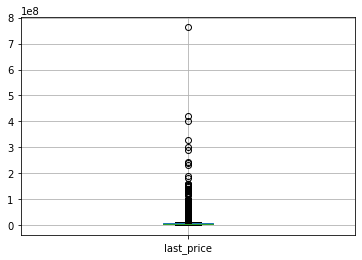

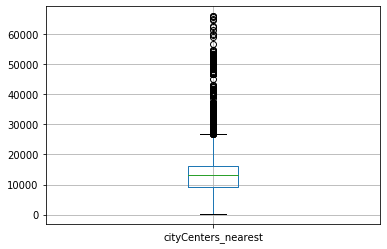

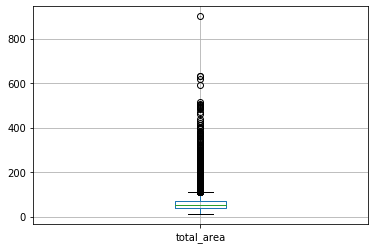

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,p_s_meter_price,weekday_exposition,month_exposition,year_exposition,new_floor,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,0,...,2,755,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,0,...,0,NaN,81.0,83750,1,12,2018,первый,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,0,...,2,574,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,0,...,1,48,121.0,100000,1,6,2018,другой,0.320000,0.410000
4,6,3700000,37,2017-11-02,1,2.65,26,10.6,6,0,...,0,NaN,155.0,100000,3,11,2017,другой,0.286486,0.389189


In [10]:
last_price_by_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'median', 'min', 'max', 'count']) #находим среднее, медиану, минимальное, максимальное и количество для стоимости в зависимости от года
display(last_price_by_year) #выведем на экран полученную таблицу значений
display(data.query('last_price < 400000')) #находим и выводим строки с подозрительно низкой ценой

data.boxplot('last_price') #строим диаграмму размаха для стоимости
plt.show() #вызываем метод, показывающий отдельных график

data.boxplot('cityCenters_nearest') #строим диаграмму размаха для стоимости
plt.show() #вызываем метод, показывающий отдельных график

data.boxplot('total_area') #строим диаграмму размаха для площади
plt.show() #вызываем метод, показывающий отдельных график
  

good_data = data.query('total_area <= 500 and 400000 < last_price < 20000000 and cityCenters_nearest < 55000').reset_index(drop=True) #получим срез данных, где не будет выбросов в площади, цене и времени продажи
display(good_data.head()) #выведем на экран полученный срез


### Вывод

Исследуем средние значения цены в зависимости от года, построив сводную таблицу. Из данных видим, что в 2019 году имеется аномальное значение цены равное 12190 руб., что невозможно. Посмотрим срез данных с ценами ниже 400 тыс. руб. Оказалось, что имеется всего одна строка с такой ценой. В дальнейшем избавимся от нее. Построим диаграмму размаха стоимости, чтобы обнаружить выбросы. Видно, что после 20 млн. имеются выбросы, поэтому их надо будет исключить.
Аналогично построим диаграммы размаха для расстояния до центра и площади. Видим, что имеются выбросы в графике расстояния до цента более 55 км. и графике площади при значениях более 500.

Сделаем срез данных, в котором исключим аномально низкие значения и выбросы(выявленные для цены, площади и расстояния до центра), и сохраним их в новой таблице.

### Часть 4. Исследовательский анализ данных:

#### 11-bullet

4. Факторы, которые больше всего влияют на стоимость квартиры.

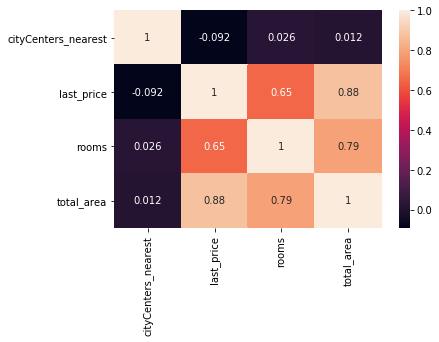

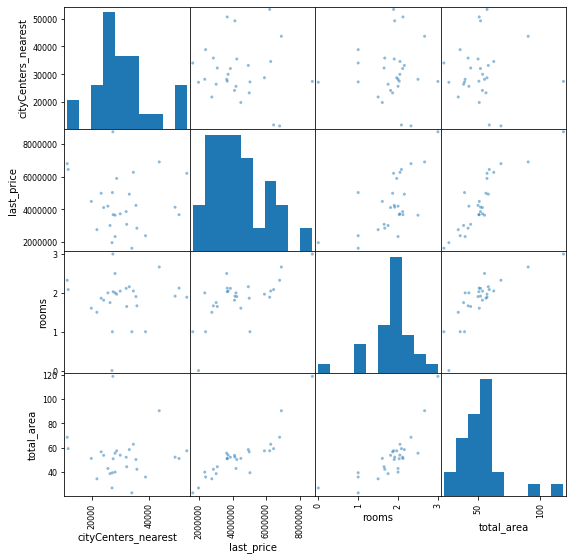

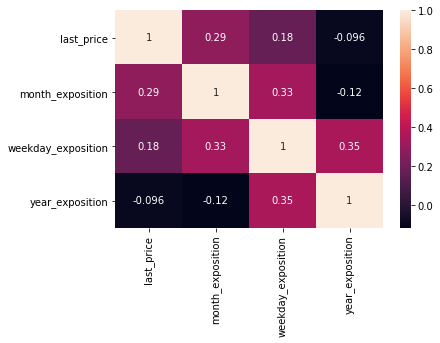

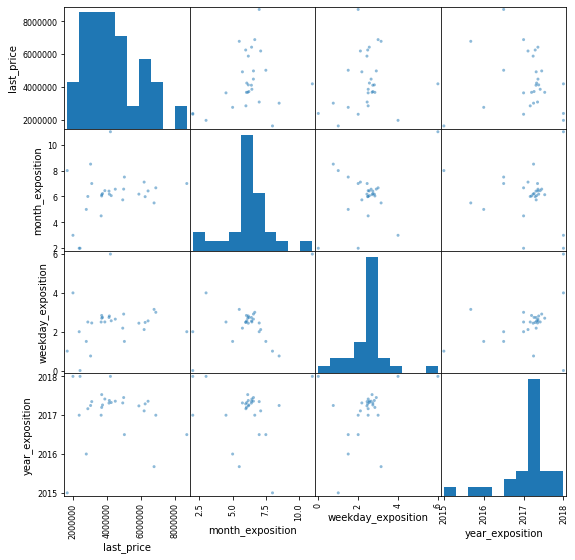

new_floor
другой       5250000
первый       4570000
последний    5050000
Name: last_price, dtype: int64

In [11]:
data_corr_1 = good_data.pivot_table(index='locality_name', values=['last_price', 'total_area', 'rooms', 'cityCenters_nearest']) #создадим сводную таблицу значений площади, комнат и расстояния на основе цены
plt.show() #применим метод построения отдельных графиков, чтобы последующие не накладывались

import seaborn as sb #импортирую бибилотеку сиабон
sb.heatmap(data_corr_1.corr(), annot=True) #методом heatmap строю корреляцию
plt.show() #применим метод построения отдельных графиков, чтобы последующие не накладывались
pd.plotting.scatter_matrix(data_corr_1, figsize=(9, 9)) #строим диаграмму рассеивания
plt.show() #применяем метод для раздельного выведения диаграммы на экран

data_corr_2 = good_data.pivot_table(index='locality_name', values=['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']) #создадим сводную таблицу значений дня недели, месяца и года на основе цены
sb.heatmap(data_corr_2.corr(), annot=True) #методом heatmap строю корреляцию
plt.show()
pd.plotting.scatter_matrix(data_corr_2, figsize=(9, 9)) #строим диаграмму рассеивания
plt.show() #применяем метод для раздельного выведения диаграммы на экран

data_corr_3 = good_data.groupby('new_floor')['last_price'].median() #создадим новую таблицу средних значений цены в зависмости от этажа 
display(data_corr_3) #выведем на экран 

### Вывод

На основе новой таблицы создадим сводные таблицы:
1) сводная таблица зависимости цены, площади, комнат и расстояния до центра. В качестве индекса используем названия населенных пунктов.
2) сводная таблица зависимости цены, дня недели, месяца и года. В качестве индекса используем названия населенных пунктов.
Также сгруппируем средние значения стоимости в зависимости от этажа(первого, последнего и другого).
Построим диаграммы рассеивания к первым двум таблицам и выведем коэффиценты корреляции значений этих таблиц.

Полученные коэффиценты, диаграммы свидетельствуют о следующем: 

- цена от близости расположения к центру имеет отрицательную корреляцию, а такие катергории, как количество комнат и площадь имеют большую корреляцию, близкую к единице. Другими словами цена очень сильно зависит от площади квартиры.

- цена совсем незначительно зависит от дня недели, от месяца, и имеет небольшую отрицательную корреляцию от года.

- имеется зависимость между стоимостью и тем, на каком этаже находится квартира. Так, дешевле всего квартиры на первых этажах, немного дороже на последних этажах и самые дорогие - квартиры, расположенные не на первом и не на последнем этажах.

### Часть 4. Исследовательский анализ данных:

#### 12-bullet

5. 10 населённых пунктов с наибольшим числом объявлений.

In [12]:
top_10_good_data = good_data.groupby('locality_name')['p_s_meter_price'].median().sort_values(ascending=False) #сгруппируем среднюю стоимость квадратного метра по населенным пунктам и отсортируем по убыванию стоимости
display(top_10_good_data.head(10)) #выведем 10 самых дорогих населенных пунктов

locality_name
посёлок Лисий Нос    123135.5
Зеленогорск          106014.0
Санкт-Петербург      104000.0
Пушкин               100000.0
Сестрорецк            99645.5
посёлок Левашово      97674.0
Без названия          96216.5
посёлок Парголово     92222.0
посёлок Стрельна      87497.5
Павловск              85409.5
Name: p_s_meter_price, dtype: float64

### Вывод

Сгруппируем таблицу по населенным пунктам со средними значениями стоимости квадратного метра, при этом отсортируем полученные значения в порядке убывания.
Далее выведем на экран 10 населенных пунктов с самыми высокими значениями стоимости квадратного метра, и 10 населенных пунктов с самыми низкими значениями стоимости квадратного метра.
Как видим, посёлок Лисий Нос имеет самую высокую среднюю стоимость квадратного метра, а самую низкую стоимость квадратного метра в топ 10 имеет Павловск.

### Часть 4. Исследовательский анализ данных:

#### 13-bullet

6. Зависимость цены от удалённости от центра.

,p_s_meter_price
cityCenters_km,
0,117171.0
1,116057.5
2,110588.0
3,106122.0
4,120256.5
5,120370.0
6,121558.0
7,122222.0
8,112307.0


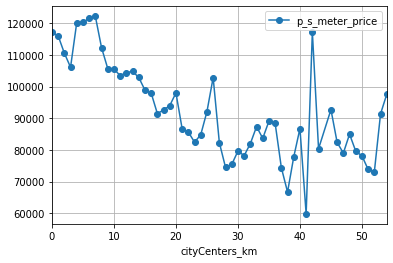

In [13]:
price_cityCenters_nearest = good_data.query('locality_name == "Санкт-Петербург"') #сделаем срез данных только по г. Санкт-Петербург     
good_data['cityCenters_km'] = good_data['cityCenters_nearest'] / 1000 #добавим столбец расстояния от центра в километрах
good_data['cityCenters_km'] = good_data['cityCenters_km'].astype('int') #переведем формат образовавшейся колонки в целочисленный

data_corr_4 = good_data.pivot_table(index='cityCenters_km', values=['p_s_meter_price'], aggfunc='median') #создадим сводную таблицу средней стоимости квадратного метра в зависимости от расстояния в километрах
display(data_corr_4.head(10)) #выведем 10 строк сводной таблицы на экран
data_corr_4.plot(style='o-', grid=True) #построим гисторгамму значений сводной таблицы

### Вывод

Сделаем срез данных только по городу Санкт-Петербургу. Затем добавим новый столбец - расстояние до центра в километрах. Для этого поделим данные столбца расстояние до цента на 1000. Затем приведем тип значений новой колонки к целочисленному. Теперь можно работать. Создадим сводную таблицу, где в качестве индекса будут значения рассотояния в километрах, а в качестве значений будут использоваться средние значения стоимости квадратного метра.
Затем постороим гисторгамму.
Как видно из гисторгаммы, с 3 км впоть до значения 7 км., после чего график начинает резкое падение стоимости квадратного метра. Отсюда можно предопложить, что центральная зона ограничивается 7 километрами.



### Часть 4. Исследовательский анализ данных:

#### 14-bullet

7. Сегмент квартир в центре: описание

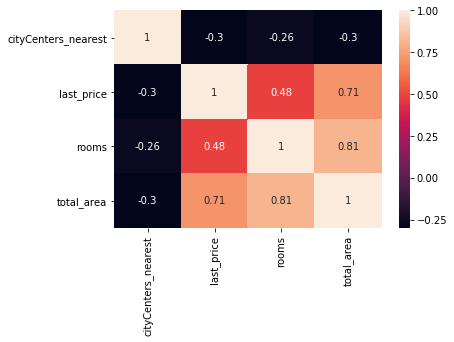

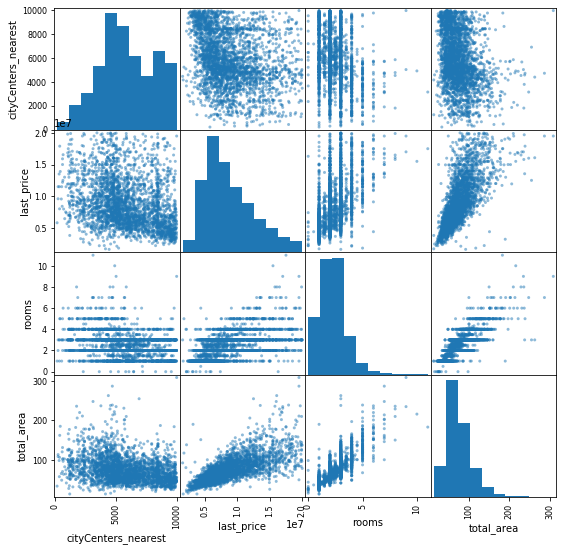

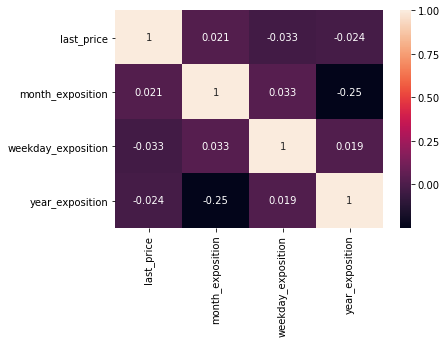

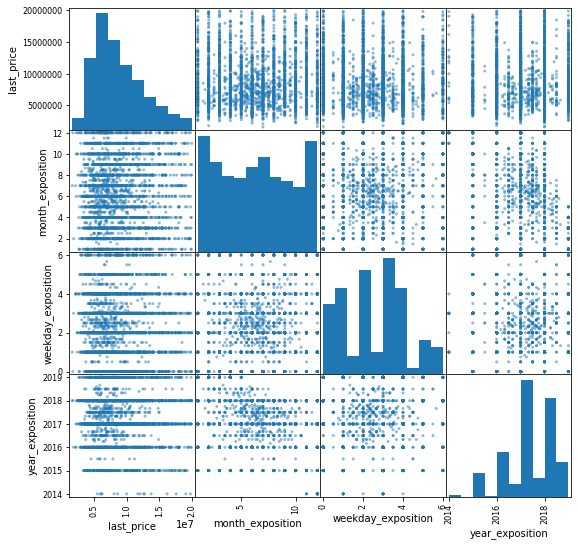

new_floor
другой       7800000
первый       5900000
последний    7590000
Name: last_price, dtype: int64

In [14]:
data_center = good_data.query('cityCenters_km < 10') #сделаем срез данных по расстоянию от центра в километрах

data_center_corr_1 = data_center.pivot_table(index='p_s_meter_price', values=['last_price', 'total_area', 'rooms', 'cityCenters_nearest']) #создаем сводную таблицу значений цены от площади, комнат и расстояния до центра
sb.heatmap(data_center_corr_1.corr(), annot=True) #методом heatmap строю корреляцию
plt.show() #применим метод построения отдельных графиков, чтобы последующие не накладывались
pd.plotting.scatter_matrix(data_center_corr_1, figsize=(9, 9)) #строим диаграмму рассеивания
plt.show() #применяем метод для раздельного выведения диаграммы на экран

data_center_corr_1
data_center_corr_2 = data_center.pivot_table(index='p_s_meter_price', values=['last_price', 'weekday_exposition', 'month_exposition', 'year_exposition']) #создаем сводную таблицу значений цены дня недели, месяца и года
sb.heatmap(data_center_corr_2.corr(), annot=True)
pd.plotting.scatter_matrix(data_center_corr_2, figsize=(9, 9)) #строим диаграмму рассеивания
plt.show() #применяем метод для раздельного выведения диаграммы на экран

data_center_corr_3 = data_center.groupby('new_floor')['last_price'].median() #сгруппируем данны средней стоимости в зависимости от этажа
display(data_center_corr_3) #выводим на экран сгруппированную таблицу


### Вывод

Как выяснили ранее, центальная часть города ограничивается радиусом в 10 км. Сделаем срез данных по значению колонки расстояние в километрах менее 10.
Далее повторим те же операции, что производили в 4 наблюдении 4 части, только в качестве индекса для сводных таблиц используем стоимость квадратного метра.
Как видим.

- цена от близости расположения к центру имеет отрицательную корреляцию, а такие катергории, как количество комнат и площадь имеют большую корреляцию, близкую к единице. Другими словами цена очень сильно зависит от площади квартиры. По данным параметрам ситуация схожа с общей картиной.

- цена имеет небольшу отрицательную корреляцию для дня недели, месяца и почти отсутствующую коррелицию от года. Здесь ситуация немного отличается от общей картины. Продажи/покупки в центре происходят по другому принципу, чем в целом. Этим можно объяснить разницу в показателях.

- касаемо расположения квартиры на первом и последних этажах, ситуация почти аналогичная. Также значительно дешевле квартиры на первом этаже, но уже стоимости последнего этажа практически соответствует остальным этажам. Это объясняется малоэтажной застройкой центра.


### Часть 5. Общий вывод

#### 15-bullet

1. Общий вывод.

### Вывод

Исследование в целом показало, что стоимость квартиры очень сильно зависит от площади, нахождения на первом, последнем или других этажах. Чуть меньше стоимость квартиры зависит от количества комнат. Практически не влияет на стоимость квартиры время продажи(день недели, месяц, год). Нет прямой зависимости между стоимостью квартиры и дальностью расположения от центра (имеются отдаленные районы с высокой стоимостью жилья). Самая дорогая недвижимость оказалась за пределами Санкт-Петербурга.